# CHIKV_Mac HIPPO FFF Prod. 6 (starting recipe)

## Setup

In [1]:
%load_ext autoreload
%autoreload 2
import hippo
from pathlib import Path
from mlog import setup_logger
import pandas as pd
import numpy as np
logger=setup_logger('notebook')

In [2]:
# !cp -v CHIKV_prod5.sqlite CHIKV_prod6.sqlite

In [3]:
animal = hippo.HIPPO('CHIKV_prod6', 'CHIKV_prod6.sqlite')

Creating HIPPO animal
name = CHIKV_prod6
db_path = CHIKV_prod6.sqlite
DEBUG: hippo3.Database.__init__()
DEBUG: Database.path = CHIKV_prod6.sqlite
DEBUG: hippo3.Database.connect()
DEBUG: sqlite3.version='2.6.0'
 SUCCESS  Database connected @ CHIKV_prod6.sqlite!
 SUCCESS  Initialised animal HIPPO("CHIKV_prod6")!


In [4]:
bases = animal.compounds(tag='Syndirella base')

In [15]:
%%time
recipe = hippo.Recipe.from_compounds(bases, pick_cheapest_inner_routes=True, supplier='Enamine', quoted_only=True, debug=False)

#compounds = 68
Solving individual compound recipes...


  0%|          | 0/68 [00:00<?, ?it/s]

 ERROR  No entry in quote with quote_compound=91!
 ERROR  Reactants not available for reaction=R22: C4458 + C4459 -> C91 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=91!
 ERROR  Reactants not available for reaction=R23: C4458 + C4460 -> C91 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C91!


  1%|▏         | 1/68 [00:01<01:19,  1.18s/it]

 ERROR  No entry in quote with quote_compound=92!
 ERROR  Reactants not available for reaction=R32: C4470 + C4471 -> C92 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C92!


  3%|▎         | 2/68 [00:01<01:00,  1.10it/s]

 ERROR  No entry in quote with quote_compound=93!


  4%|▍         | 3/68 [00:03<01:21,  1.25s/it]

 ERROR  No entry in quote with quote_compound=95!


  6%|▌         | 4/68 [00:05<01:25,  1.34s/it]

 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R86: C4536 + C4537 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R87: C4536 + C4538 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R88: C4537 + C4539 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=98!
 ERROR  Reactants not available for reaction=R89: C4538 + C4539 -> C98 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C98!


  7%|▋         | 5/68 [00:07<01:43,  1.64s/it]

 ERROR  No entry in quote with quote_compound=100!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  Reactants not available for reaction=R26: C50 + C4463 -> C4464 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No entry in quote with quote_compound=100!
 ERROR  Reactants not available for reaction=R93: C4464 + C4544 -> C100 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C100!


  9%|▉         | 6/68 [00:09<01:59,  1.93s/it]

 ERROR  No entry in quote with quote_compound=101!
 ERROR  Reactants not available for reaction=R102: C4552 + C4553 -> C101 via Amidation!
 ERROR  No solutions for compound=C101!


 10%|█         | 7/68 [00:10<01:35,  1.56s/it]

 ERROR  No entry in quote with quote_compound=104!


 12%|█▏        | 8/68 [00:12<01:34,  1.57s/it]

 ERROR  No entry in quote with quote_compound=372!
 ERROR  Reactants not available for reaction=R12: C1468 + C4440 -> C372 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C372!


 13%|█▎        | 9/68 [00:12<01:18,  1.33s/it]

 ERROR  No entry in quote with quote_compound=555!
 ERROR  Reactants not available for reaction=R119: C4426 + C4572 -> C555 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=555!
 ERROR  Reactants not available for reaction=R120: C4426 + C4573 -> C555 via Ester_amidation!
 ERROR  No solutions for compound=C555!


 15%|█▍        | 10/68 [00:14<01:14,  1.29s/it]

 ERROR  No entry in quote with quote_compound=569!
 ERROR  Reactants not available for reaction=R50: C4491 + C4492 -> C569 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C569!


 16%|█▌        | 11/68 [00:14<01:04,  1.14s/it]

 ERROR  No solutions for compound=C576!


 18%|█▊        | 12/68 [00:15<00:50,  1.12it/s]

 ERROR  No entry in quote with quote_compound=596!
 ERROR  Reactants not available for reaction=R58: C4502 + C4503 -> C596 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C596!


 19%|█▉        | 13/68 [00:16<00:48,  1.14it/s]

 ERROR  No entry in quote with quote_compound=627!
 ERROR  Reactants not available for reaction=R1: C4423 + C4424 -> C627 via Amidation!
 ERROR  No solutions for compound=C627!


 21%|██        | 14/68 [00:16<00:46,  1.16it/s]

 ERROR  No entry in quote with quote_compound=653!
 ERROR  Reactants not available for reaction=R3: C4427 + C4428 -> C653 via Amidation!
 ERROR  No solutions for compound=C653!


 22%|██▏       | 15/68 [00:17<00:45,  1.17it/s]

 ERROR  No entry in quote with quote_compound=662!
 ERROR  No entry in quote with quote_compound=4469!
 ERROR  Reactants not available for reaction=R31: C4443 + C4468 -> C4469 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C662!


 24%|██▎       | 16/68 [00:19<01:02,  1.21s/it]

 ERROR  No entry in quote with quote_compound=680!
 ERROR  Reactants not available for reaction=R34: C18 + C4473 -> C680 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C680!


 25%|██▌       | 17/68 [00:20<00:56,  1.10s/it]

 ERROR  No entry in quote with quote_compound=718!
 ERROR  Reactants not available for reaction=R121: C19 + C4574 -> C718 via Nucleophilic_substitution_with_amine!
 ERROR  No solutions for compound=C718!


 26%|██▋       | 18/68 [00:21<00:50,  1.00s/it]

 ERROR  No entry in quote with quote_compound=760!
 ERROR  Reactants not available for reaction=R104: C4555 + C4556 -> C760 via Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol!
 ERROR  No solutions for compound=C760!


 28%|██▊       | 19/68 [00:22<00:45,  1.07it/s]

 ERROR  No entry in quote with quote_compound=796!
 ERROR  No entry in quote with quote_compound=796!
 Warning  Multiple solutions for compound=C796


 29%|██▉       | 20/68 [00:24<01:09,  1.46s/it]

 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R45: C4485 + C4486 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R46: C4487 + C4488 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R47: C4485 + C4488 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=804!
 ERROR  Reactants not available for reaction=R48: C4486 + C4487 -> C804 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C804!


 31%|███       | 21/68 [00:27<01:19,  1.68s/it]

 ERROR  No entry in quote with quote_compound=849!
 ERROR  Reactants not available for reaction=R16: C4440 + C4448 -> C849 via Ester_amidation!
 ERROR  No solutions for compound=C849!


 32%|███▏      | 22/68 [00:27<01:04,  1.41s/it]

 ERROR  No entry in quote with quote_compound=992!
 ERROR  Reactants not available for reaction=R63: C4510 + C4511 -> C992 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=992!
 ERROR  No entry in quote with quote_compound=4510!
 ERROR  Reactants not available for reaction=R62: C4508 + C4509 -> C4510 via Mitsunobu_reaction_with_amine_alcohol_and_thioalcohol!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C992!


 34%|███▍      | 23/68 [00:30<01:15,  1.69s/it]

 ERROR  No entry in quote with quote_compound=1001!


 35%|███▌      | 24/68 [00:31<01:09,  1.57s/it]

 ERROR  No entry in quote with quote_compound=1012!
 ERROR  Reactants not available for reaction=R36: C4478 + C4479 -> C1012 via Amidation!
 ERROR  No solutions for compound=C1012!


 37%|███▋      | 25/68 [00:32<00:56,  1.31s/it]

 ERROR  No entry in quote with quote_compound=1029!
 ERROR  Reactants not available for reaction=R2: C4425 + C4426 -> C1029 via Amidation!
 ERROR  No solutions for compound=C1029!


 38%|███▊      | 26/68 [00:32<00:47,  1.13s/it]

 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R109: C4562 + C4563 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R110: C4562 + C4564 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R111: C4560 + C4562 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=1119!
 ERROR  Reactants not available for reaction=R112: C4558 + C4562 -> C1119 via Sp3-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C1119!


 40%|███▉      | 27/68 [00:34<00:54,  1.33s/it]

 ERROR  No entry in quote with quote_compound=1128!
 ERROR  No entry in quote with quote_compound=1128!
 ERROR  Reactants not available for reaction=R106: C4557 + C4560 -> C1128 via Sp3-sp2_Suzuki_coupling!


 41%|████      | 28/68 [00:36<00:58,  1.46s/it]

 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R5: C4431 + C4432 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R6: C4432 + C4433 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R7: C4432 + C4434 -> C1192 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=1192!
 ERROR  Reactants not available for reaction=R8: C4432 + C4435 -> C1192 via Ester_amidation!
 ERROR  No solutions for compound=C1192!


 43%|████▎     | 29/68 [00:38<01:01,  1.57s/it]

 ERROR  No entry in quote with quote_compound=1257!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  Reactants not available for reaction=R26: C50 + C4463 -> C4464 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C1257!


 44%|████▍     | 30/68 [00:39<01:00,  1.60s/it]

 ERROR  No entry in quote with quote_compound=1316!


 46%|████▌     | 31/68 [00:41<00:56,  1.52s/it]

 ERROR  No entry in quote with quote_compound=1444!
 ERROR  Reactants not available for reaction=R101: C4424 + C4551 -> C1444 via Ester_amidation!
 ERROR  No solutions for compound=C1444!


 47%|████▋     | 32/68 [00:42<00:48,  1.35s/it]

 ERROR  No entry in quote with quote_compound=1446!
 ERROR  Reactants not available for reaction=R116: C4568 + C4569 -> C1446 via Amidation!
 ERROR  No solutions for compound=C1446!


 49%|████▊     | 33/68 [00:43<00:42,  1.22s/it]

 ERROR  No entry in quote with quote_compound=1466!
 ERROR  Reactants not available for reaction=R83: C4443 + C4531 -> C1466 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C1466!


 50%|█████     | 34/68 [00:43<00:36,  1.08s/it]

 ERROR  No entry in quote with quote_compound=1472!
 ERROR  Reactants not available for reaction=R59: C1468 + C4504 -> C1472 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C1472!


 51%|█████▏    | 35/68 [00:44<00:33,  1.02s/it]

 ERROR  No entry in quote with quote_compound=1473!
 ERROR  No entry in quote with quote_compound=1473!
 Warning  Multiple solutions for compound=C1473


 53%|█████▎    | 36/68 [00:48<00:56,  1.76s/it]

 ERROR  No entry in quote with quote_compound=1476!
 ERROR  Reactants not available for reaction=R24: C4443 + C4461 -> C1476 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C1476!


 54%|█████▍    | 37/68 [00:49<00:48,  1.57s/it]

 ERROR  No entry in quote with quote_compound=1500!
 ERROR  Reactants not available for reaction=R10: C4437 + C4438 -> C1500 via Amidation!
 ERROR  No solutions for compound=C1500!


 56%|█████▌    | 38/68 [00:50<00:42,  1.43s/it]

 ERROR  No entry in quote with quote_compound=1602!
 ERROR  Reactants not available for reaction=R56: C4424 + C4500 -> C1602 via Ester_amidation!
 ERROR  No solutions for compound=C1602!


 57%|█████▋    | 39/68 [00:51<00:38,  1.31s/it]

 ERROR  No entry in quote with quote_compound=1917!


 59%|█████▉    | 40/68 [00:53<00:40,  1.43s/it]

 ERROR  No entry in quote with quote_compound=1965!
 ERROR  Reactants not available for reaction=R4: C4429 + C4430 -> C1965 via Buchwald-Hartwig_amination!
 ERROR  No solutions for compound=C1965!


 60%|██████    | 41/68 [00:54<00:34,  1.26s/it]

 ERROR  No entry in quote with quote_compound=2138!
 ERROR  Reactants not available for reaction=R52: C4494 + C4495 -> C2138 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=2138!
 ERROR  Reactants not available for reaction=R53: C4494 + C4496 -> C2138 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C2138!


 62%|██████▏   | 42/68 [00:55<00:33,  1.30s/it]

 ERROR  No entry in quote with quote_compound=2186!
 ERROR  Reactants not available for reaction=R90: C4442 + C4540 -> C2186 via Ester_amidation!
 ERROR  No solutions for compound=C2186!


 63%|██████▎   | 43/68 [00:56<00:29,  1.19s/it]

 ERROR  No entry in quote with quote_compound=2188!
 ERROR  Reactants not available for reaction=R25: C4443 + C4462 -> C2188 via Amidation!
 ERROR  No solutions for compound=C2188!


 65%|██████▍   | 44/68 [00:57<00:25,  1.08s/it]

 ERROR  No entry in quote with quote_compound=2207!
 ERROR  Reactants not available for reaction=R91: C4541 + C4542 -> C2207 via Reductive_amination!
 ERROR  No solutions for compound=C2207!


 66%|██████▌   | 45/68 [00:57<00:22,  1.04it/s]

 ERROR  No entry in quote with quote_compound=2300!
 ERROR  No entry in quote with quote_compound=4456!
 ERROR  Reactants not available for reaction=R21: C4454 + C4457 -> C4456 via Amidation!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C2300!


 68%|██████▊   | 46/68 [00:59<00:25,  1.16s/it]

 ERROR  No entry in quote with quote_compound=2311!
 ERROR  Reactants not available for reaction=R84: C4532 + C4533 -> C2311 via Nucleophilic_substitution_with_amine!
 ERROR  No solutions for compound=C2311!


 69%|██████▉   | 47/68 [01:00<00:21,  1.03s/it]

 ERROR  No entry in quote with quote_compound=2619!
 ERROR  Reactants not available for reaction=R13: C4441 + C4443 -> C2619 via Amidation!
 ERROR  No solutions for compound=C2619!


 71%|███████   | 48/68 [01:00<00:18,  1.08it/s]

 ERROR  No entry in quote with quote_compound=2916!


 72%|███████▏  | 49/68 [01:02<00:20,  1.05s/it]

 ERROR  No entry in quote with quote_compound=2919!
 ERROR  Reactants not available for reaction=R99: C4439 + C4549 -> C2919 via Amidation!
 ERROR  No solutions for compound=C2919!


 74%|███████▎  | 50/68 [01:03<00:17,  1.03it/s]

 ERROR  No entry in quote with quote_compound=2924!
 ERROR  Reactants not available for reaction=R117: C3983 + C4571 -> C2924 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=2924!
 ERROR  Reactants not available for reaction=R118: C3983 + C4528 -> C2924 via Ester_amidation!
 ERROR  No solutions for compound=C2924!


 75%|███████▌  | 51/68 [01:04<00:17,  1.03s/it]

 ERROR  No entry in quote with quote_compound=2925!


 76%|███████▋  | 52/68 [01:05<00:18,  1.15s/it]

 ERROR  No entry in quote with quote_compound=2944!
 ERROR  Reactants not available for reaction=R11: C4423 + C4439 -> C2944 via Amidation!
 ERROR  No solutions for compound=C2944!


 78%|███████▊  | 53/68 [01:06<00:15,  1.03s/it]

 ERROR  No entry in quote with quote_compound=2947!
 ERROR  Reactants not available for reaction=R65: C4439 + C4513 -> C2947 via Amidation!
 ERROR  No solutions for compound=C2947!


 79%|███████▉  | 54/68 [01:07<00:13,  1.06it/s]

 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R39: C4445 + C4481 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R40: C4447 + C4481 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R41: C4447 + C4482 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3204!
 ERROR  Reactants not available for reaction=R42: C4445 + C4482 -> C3204 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C3204!


 81%|████████  | 55/68 [01:09<00:16,  1.28s/it]

 ERROR  No entry in quote with quote_compound=3264!
 ERROR  No entry in quote with quote_compound=4567!
 ERROR  Reactants not available for reaction=R113: C4565 + C4566 -> C4567 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No entry in quote with quote_compound=3264!
 ERROR  No entry in quote with quote_compound=4567!
 ERROR  Reactants not available for reaction=R113: C4565 + C4566 -> C4567 via Nucleophilic_substitution_with_amine!
 ERROR  0 recipes with prices, can't choose cheapest!
 ERROR  No solutions for compound=C3264!


 82%|████████▏ | 56/68 [01:12<00:22,  1.86s/it]

 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R95: C4445 + C4547 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R96: C4445 + C4548 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R97: C4447 + C4548 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No entry in quote with quote_compound=3269!
 ERROR  Reactants not available for reaction=R98: C4447 + C4547 -> C3269 via Sp2-sp2_Suzuki_coupling!
 ERROR  No solutions for compound=C3269!


 84%|████████▍ | 57/68 [01:14<00:20,  1.86s/it]

 ERROR  No entry in quote with quote_compound=3284!
 ERROR  No entry in quote with quote_compound=3284!
 Warning  Multiple solutions for compound=C3284


 85%|████████▌ | 58/68 [01:16<00:20,  2.06s/it]

 ERROR  No entry in quote with quote_compound=3344!
 ERROR  Reactants not available for reaction=R28: C4443 + C4465 -> C3344 via Amidation!
 ERROR  No solutions for compound=C3344!


 87%|████████▋ | 59/68 [01:17<00:14,  1.64s/it]

 ERROR  No entry in quote with quote_compound=3611!
 ERROR  Reactants not available for reaction=R55: C4498 + C4499 -> C3611 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C3611!


 88%|████████▊ | 60/68 [01:18<00:10,  1.36s/it]

 ERROR  No entry in quote with quote_compound=3624!


 90%|████████▉ | 61/68 [01:19<00:09,  1.35s/it]

 ERROR  No entry in quote with quote_compound=3625!


 91%|█████████ | 62/68 [01:20<00:08,  1.34s/it]

 ERROR  No entry in quote with quote_compound=3627!
 ERROR  Reactants not available for reaction=R100: C4452 + C4550 -> C3627 via Ester_amidation!
 ERROR  No solutions for compound=C3627!


 93%|█████████▎| 63/68 [01:21<00:05,  1.16s/it]

 ERROR  No entry in quote with quote_compound=3628!


 94%|█████████▍| 64/68 [01:22<00:04,  1.23s/it]

 ERROR  No entry in quote with quote_compound=3632!
 ERROR  Reactants not available for reaction=R19: C4452 + C4453 -> C3632 via Amidation!
 ERROR  No solutions for compound=C3632!


 96%|█████████▌| 65/68 [01:23<00:03,  1.07s/it]

 ERROR  No entry in quote with quote_compound=3653!
 ERROR  Reactants not available for reaction=R44: C4452 + C4484 -> C3653 via N-nucleophilic_aromatic_substitution!
 ERROR  No solutions for compound=C3653!


 97%|█████████▋| 66/68 [01:24<00:01,  1.03it/s]

 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R66: C3755 + C4514 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R67: C3755 + C4515 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R68: C3755 + C4516 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R69: C3755 + C4517 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R70: C3755 + C4518 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R71: C3755 + C4519 -> C3668 via Ester_amidation!
 ERROR  No entry in quote with quote_compound=3668!
 ERROR  Reactants not available for reaction=R72: C3755 + C4520 -> C3668

 99%|█████████▊| 67/68 [01:31<00:02,  2.73s/it]

 ERROR  No entry in quote with quote_compound=3830!
 ERROR  Reactants not available for reaction=R107: C4449 + C4561 -> C3830 via Amidation!
 ERROR  No solutions for compound=C3830!


100%|██████████| 68/68 [01:31<00:00,  1.35s/it]

Solving recipe combinations...
Combining recipes...



100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

Picking cheapest...
CPU times: user 5.28 s, sys: 6.28 s, total: 11.6 s
Wall time: 1min 32s


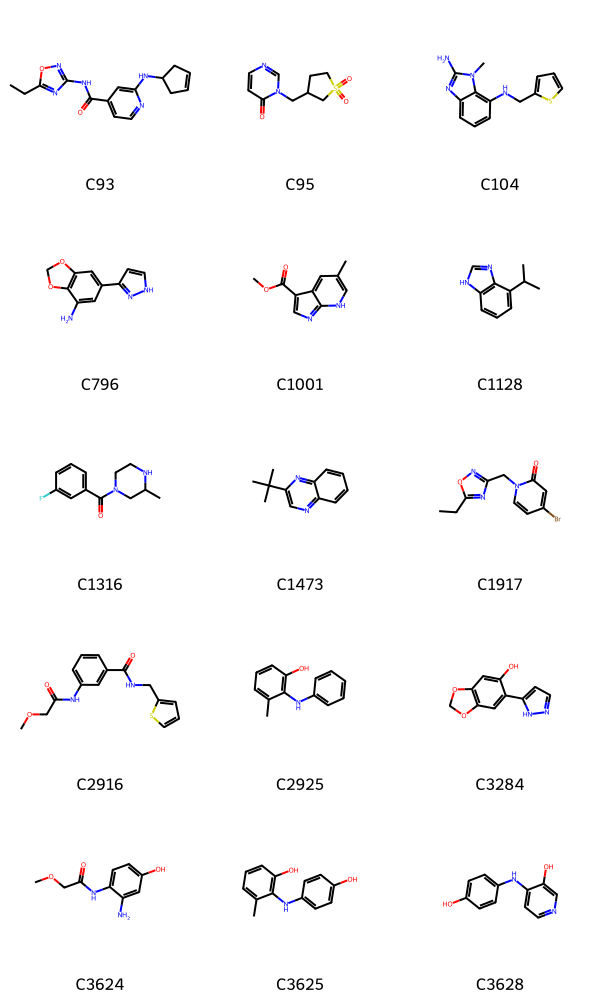

In [17]:
recipe.products.draw()

In [18]:
animal.compounds(smiles='O=c1ccccn1Cc1noc(-c2cnc3[nH]ccc3c2)n1')

C100 "LKSJOAHCUYUSRB-UHFFFAOYSA-N"

In [21]:
recipes = hippo.Recipe.from_compounds(animal.compounds[100,], pick_cheapest=False)

#compounds = 1
Solving individual compound recipes...
 ERROR  No entry in quote with quote_compound=100!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  No entry in quote with quote_compound=4463!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  No entry in quote with quote_compound=100!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  No entry in quote with quote_compound=4463!
 ERROR  No entry in quote with quote_compound=4464!
 ERROR  No entry in quote with quote_compound=4544!
 Warning  Multiple solutions for compound=C100
Solving recipe combinations...
Combining recipes...


In [34]:
recipe

Recipe({I x 27} --> {I x 0} --> {I x 15} via {R x 15})

In [37]:
recipe.write_json('CHIKV_15scaffolds_recipe.json')

 DISK  Writing CHIKV_15scaffolds_recipe.json


In [39]:
animal.compounds(tag='Syndirella base').elabs

{C x 76223}

In [40]:
animal.reactants

all reactants: {C x 9931}

In [43]:
animal.db.execute('SELECT COUNT(DISTINCT quote_compound) FROM quote').fetchone()

(5261,)

In [46]:
recipe.products.compounds.elabs

{C x 27429}

In [53]:
poses15 = recipe.products.compounds.poses.get_by_tag('deprecated', inverse=True)

In [54]:
poses15.to_fragalysis('syndirella_scaffolds_44from15.sdf',
                      method='Accessible FFF Scaffolds',
                      submitter_name='Max Winokan',
                      submitter_email='max.winokan@diamond.ac.uk',
                      submitter_institution='DLS',
                     )

 DISK  Reading /opt/xchem-fragalysis-2/kfieseler/CHIKV-Mac/XQWKZXHQRAAZAF-UHFFFAOYSA-N/output/XQWKZXHQRAAZAF-UHFFFAOYSA-N-UwZThX-122-A/XQWKZXHQRAAZAF-UHFFFAOYSA-N-UwZThX-122-A.minimised.mol
 DISK  Writing syndirella_scaffolds_44from15.sdf


[09:27:52] Molecule does not have explicit Hs. Consider calling AddHs()


,HIPPO ID,inchikey,alias,_Name,original SMILES,original ID,ROMol,tags,ref_mols,ref_pdb,generation_date,submitter_name,method,submitter_email,ref_url
0,6236,QVSYFXSEJNFZKD-UHFFFAOYSA-N,None,QVSYFXSEJNFZKD-UHFFFAOYSA-N,COCC(=O)Nc1cccc(C(=O)NCc2cccs2)c1,QVSYFXSEJNFZKD-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f10152e3560>,(Syndirella base),"cx0692a,c0692a,c0892a",c0270a,None,None,None,None,None
1,6237,JXRCCCJCUJURBQ-UHFFFAOYSA-N,None,JXRCCCJCUJURBQ-UHFFFAOYSA-N,Cc1cccc(O)c1Nc1ccc(O)cc1,JXRCCCJCUJURBQ-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed8c090>,(Syndirella base),"cx0935a,c0935a,c1116c,c1116a",c0270a,None,None,None,None,None
2,6243,UGYMLSSIEIESGU-MRVPVSSYSA-N,None,UGYMLSSIEIESGU-MRVPVSSYSA-N,O=c1ccncn1C[C@H]1CCS(=O)(=O)C1,UGYMLSSIEIESGU-MRVPVSSYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f10152e06d0>,(Syndirella base),"cx0314a,cx1182a,c0314a,c1182a",c0300a,None,None,None,None,None
3,6244,UGYMLSSIEIESGU-MRVPVSSYSA-N,None,UGYMLSSIEIESGU-MRVPVSSYSA-N,O=c1ccncn1C[C@H]1CCS(=O)(=O)C1,UGYMLSSIEIESGU-MRVPVSSYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed55b70>,(Syndirella base),"cx0314a,cx1182a,c0314a,c1182a",c0300a,None,None,None,None,None
4,6251,QQERROZMPKKQER-UHFFFAOYSA-N,None,QQERROZMPKKQER-UHFFFAOYSA-N,CCc1nc(Cn2ccc(Br)cc2=O)no1,QQERROZMPKKQER-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed56e30>,(Syndirella base),"c0316a,c1091a",c0300a,None,None,None,None,None
5,6255,XMHJIXAUMMKGLT-UHFFFAOYSA-N,None,XMHJIXAUMMKGLT-UHFFFAOYSA-N,COCC(=O)Nc1ccc(O)cc1N,XMHJIXAUMMKGLT-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed556c0>,(Syndirella base),"cx0935a,c0935a,c1353a",c0270a,None,None,None,None,None
6,6257,RGWZNWCCBDMABV-UHFFFAOYSA-N,None,RGWZNWCCBDMABV-UHFFFAOYSA-N,Nc1cc(-c2cc[nH]n2)cc2c1OCO2,RGWZNWCCBDMABV-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed545e0>,(Syndirella base),"cx1338a,cx0864a,c0864a,c1338a",c0300a,None,None,None,None,None
7,6259,RGWZNWCCBDMABV-UHFFFAOYSA-N,None,RGWZNWCCBDMABV-UHFFFAOYSA-N,Nc1cc(-c2cc[nH]n2)cc2c1OCO2,RGWZNWCCBDMABV-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed996c0>,(Syndirella base),"cx0864a,c0864a,c1203a",c0300a,None,None,None,None,None
8,6260,MIMRXPBJLOWRMN-UHFFFAOYSA-N,None,MIMRXPBJLOWRMN-UHFFFAOYSA-N,Oc1ccc(Nc2ccncc2O)cc1,MIMRXPBJLOWRMN-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed7d800>,(Syndirella base),"cx0935a,c0935a,c1132a,c1132f",c0270a,None,None,None,None,None
9,6276,MMXSHBZOILNLPJ-UHFFFAOYSA-N,None,MMXSHBZOILNLPJ-UHFFFAOYSA-N,CC(C)(C)c1cnc2ccccc2n1,MMXSHBZOILNLPJ-UHFFFAOYSA-N,<rdkit.Chem.rdchem.Mol object at 0x7f100ed7cae0>,(Syndirella base),"c0839a,c1299a",c0300a,None,None,None,None,None
